In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('cleaned_hotelreviews.csv')

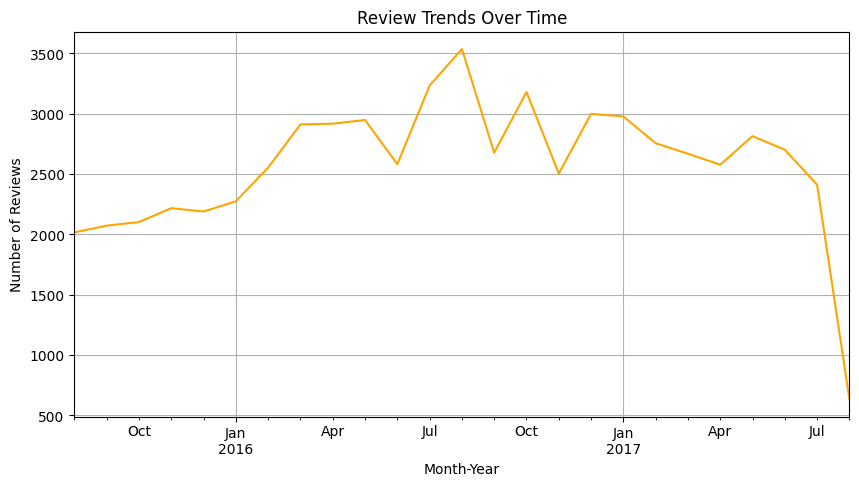

In [7]:
# Reviewing the number of reviews over time to ensure the relevancy of data

# I will first convert review date to datetime and extract the month and year / Then I will count the number of reviews per month
data['Review_Month'] = pd.to_datetime(data['Review_Date']).dt.to_period('M')
review_trends = data.groupby('Review_Month').size()

# Plotting the relationship
review_trends.plot(kind='line', figsize=(10, 5), title="Review Trends Over Time", color='orange')
plt.xlabel("Month-Year")
plt.ylabel("Number of Reviews")
plt.grid()
plt.show()

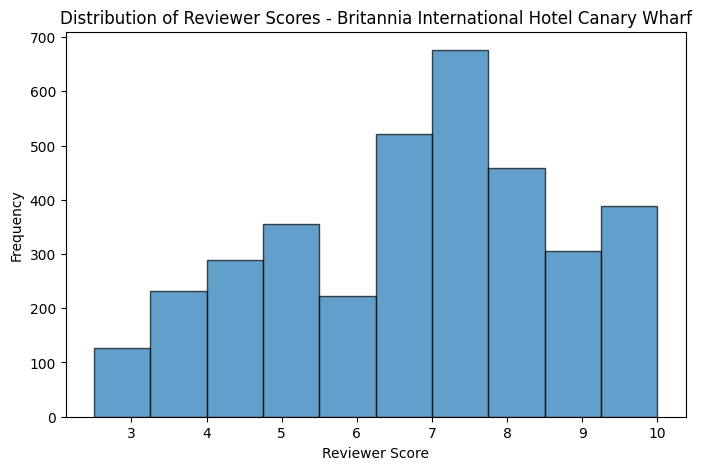

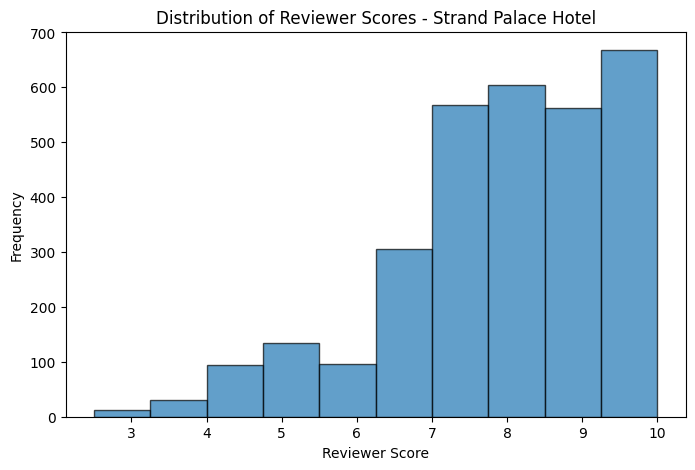

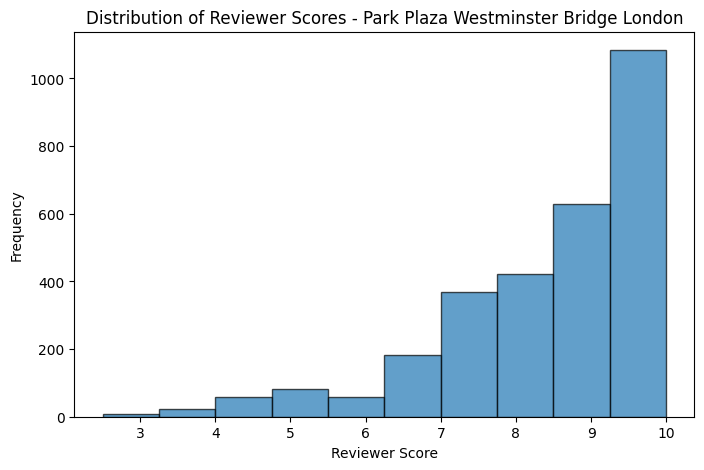

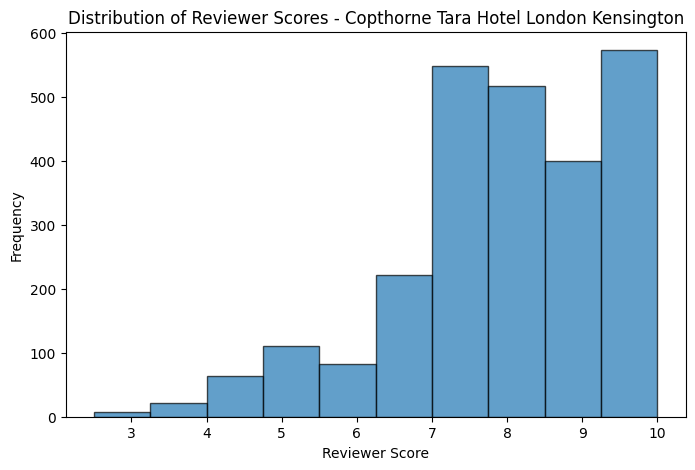

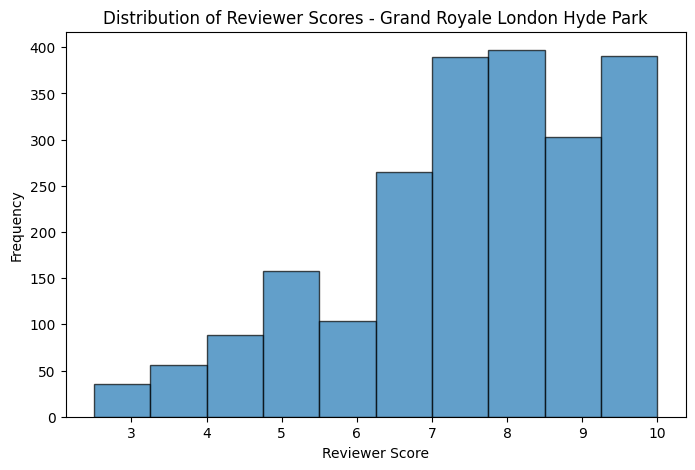

In [8]:
# Distribution of Reviewer Scores for Popular Hotels

# Selecting the top 5 hotels with the most reviews
top_hotels = data['Hotel_Name'].value_counts().head(5).index

# Loop through each hotel and plot the distribution
for hotel in top_hotels:
    hotel_data = data[data['Hotel_Name'] == hotel]
    hotel_data['Reviewer_Score'].hist(bins=10, figsize=(8, 5), alpha=0.7, edgecolor='black')
    plt.title(f"Distribution of Reviewer Scores - {hotel}")
    plt.xlabel("Reviewer Score")
    plt.ylabel("Frequency")
    plt.grid()
    plt.show()


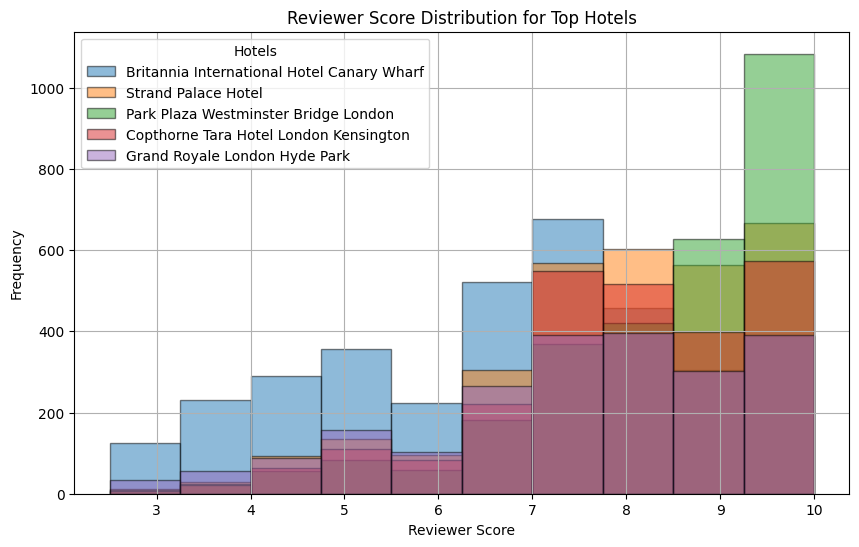

In [9]:
# Plotting the overlayed histograms for the top 5 hotels with different colors
top_hotels = data['Hotel_Name'].value_counts().head(5).index

plt.figure(figsize=(10, 6))
for hotel in top_hotels:
    hotel_data = data[data['Hotel_Name'] == hotel]
    plt.hist(hotel_data['Reviewer_Score'], bins=10, alpha=0.5, label=hotel, edgecolor='black')

plt.title("Reviewer Score Distribution for Top Hotels")
plt.xlabel("Reviewer Score")
plt.ylabel("Frequency")
plt.legend(title="Hotels")
plt.grid()
plt.show()


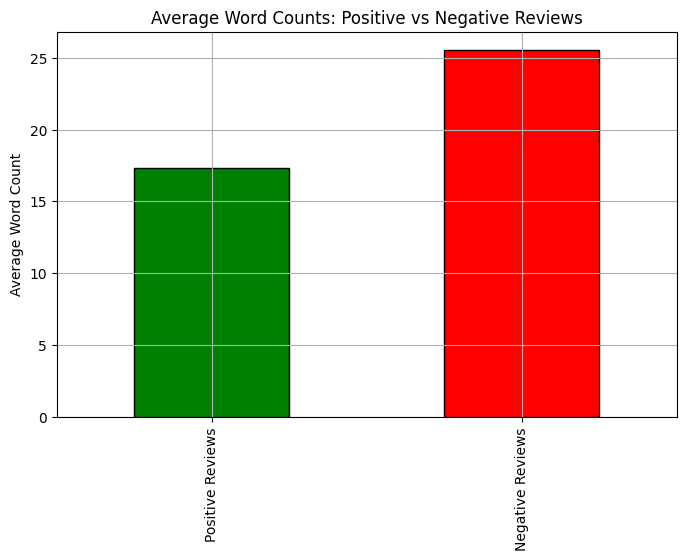

In [10]:
# Bar graph for an overview of Positive vs Negative reviews
word_counts = data[['Review_Total_Positive_Word_Counts', 'Review_Total_Negative_Word_Counts']].mean()
word_counts.plot(kind='bar', figsize=(8, 5), color=['green', 'red'], edgecolor='black')
plt.title("Average Word Counts: Positive vs Negative Reviews")
plt.ylabel("Average Word Count")
plt.xticks([0, 1], ['Positive Reviews', 'Negative Reviews'])
plt.grid()
plt.show()


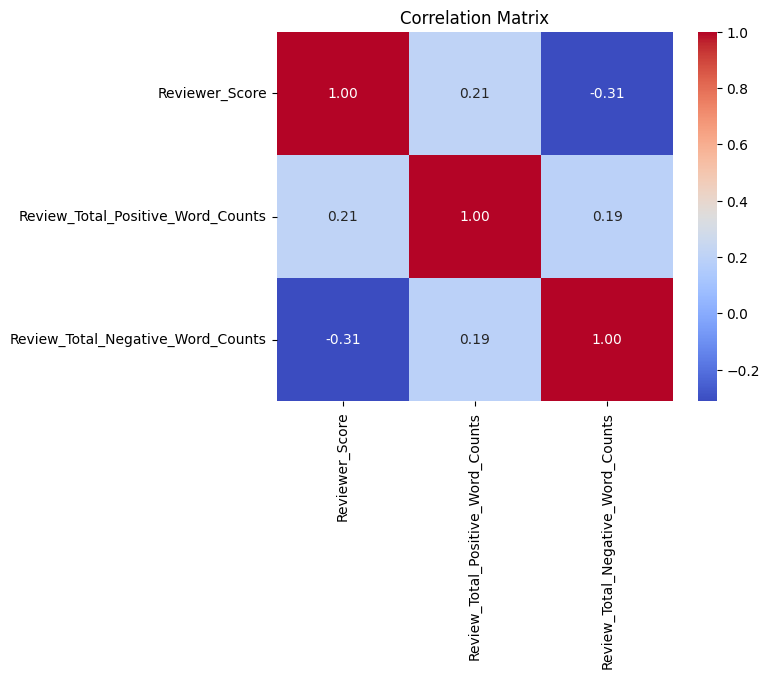

In [11]:
# Correlation Matrix showing the relationship between score and positive/negative word counts
correlation_matrix = data[['Reviewer_Score', 'Review_Total_Positive_Word_Counts', 'Review_Total_Negative_Word_Counts']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [14]:
# Most Common Words in Reviews (Pre-Sentiment Analysis)

from collections import Counter
from wordcloud import STOPWORDS

# Combine positive and negative reviews into a single text
all_reviews = " ".join(data['Positive_Review'].astype(str)) + " " + " ".join(data['Negative_Review'].astype(str))

# Remove stopwords
stopwords = set(STOPWORDS)
words = [word for word in all_reviews.lower().split() if word not in stopwords]

# Count the most common words
word_counts = Counter(words).most_common(20)
print("Most Common Words in Reviews:", word_counts)


Most Common Words in Reviews: [('room', 50174), ('staff', 29497), ('hotel', 25844), ('location', 25813), ('breakfast', 19153), ('good', 18385), ('t', 15744), ('great', 13999), ('bed', 12965), ('rooms', 10810), ('friendly', 10231), ('nice', 9668), ('clean', 9557), ('small', 9365), ('helpful', 8843), ('comfortable', 8337), ('excellent', 7784), ('bar', 7373), ('nothing', 7235), ('service', 6667)]


In [16]:
# Hotel Rankings by Reviewer Score

hotel_rankings = data.groupby('Hotel_Name')['Reviewer_Score'].mean().sort_values(ascending=False)
print(hotel_rankings.head(10))  # Top 10 highest-rated hotels
print(hotel_rankings.tail(10))  # Bottom 10 lowest-rated hotels

Hotel_Name
Intercontinental London The O2               9.372028
Hotel Esther a                               9.121815
citizenM Tower of London                     9.025678
citizenM London Bankside                     8.988213
Mondrian London                              8.969209
M by Montcalm Shoreditch London Tech City    8.937236
Crowne Plaza London Docklands                8.652936
Hilton London Wembley                        8.615658
Best Western Premier Hotel Couture           8.615184
The Student Hotel Amsterdam City             8.611939
Name: Reviewer_Score, dtype: float64
Hotel_Name
Hilton London Kensington Hotel                7.664930
Holiday Inn London Kensington                 7.646106
The Park Grand London Paddington              7.586840
Grand Royale London Hyde Park                 7.531079
Millennium Gloucester Hotel London            7.526222
Mercure Paris Terminus Nord                   7.276791
Hilton London Metropole                       7.249845
The Cumberland A